#Main

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 5, 4)]               0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 1, 4)]               0         []                            
                                                                                                  
 lstm_7 (LSTM)               [(None, 64),                 17664     ['input_7[0][0]']             
                              (None, 64),                                                         
                              (None, 64)]                                                         
                                                                                            

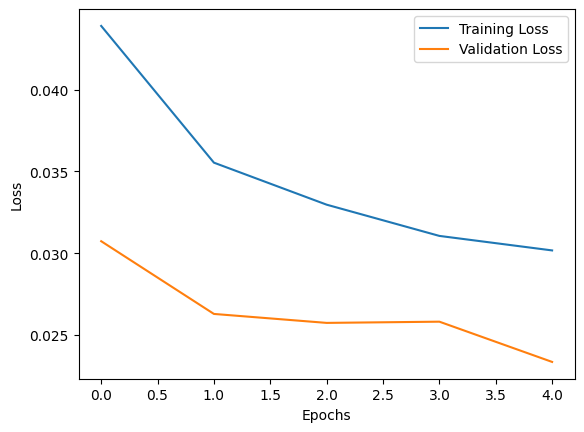

Train Accuracy: 0.9698311630636454
Test Accuracy: 0.9729184936732054


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import LSTM, Dense, Input
from keras.callbacks import EarlyStopping

# Load and preprocess the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/coor_vel.csv')

# Drop any rows with missing values
df.dropna(inplace=True)
cols = list(df)[1:5]
df = df[cols].astype(float)

# Extract features and scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Define parameters
n_past = 5  # Number of past timesteps
n_future = 1  # Number of future timesteps to predict
num_features = scaled_df.shape[1]  # Number of features in the dataset
latent_dim = 64  # Latent dimension for LSTM
epochs = 5
batch_size = 32

# Prepare data for training
trainX = []
trainY = []
for i in range(n_past, len(scaled_df) - n_future + 1):
    trainX.append(scaled_df[i - n_past:i, :num_features])
    trainY.append(scaled_df[i:i + n_future, :num_features])
trainX, trainY = np.array(trainX), np.array(trainY)

# Define encoder input
encoder_inputs = Input(shape=(n_past, num_features))
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Define decoder input
decoder_inputs = Input(shape=(n_future, num_features))

# Define decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Define dense layer
decoder_dense = Dense(num_features, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

# Train the model
history = model.fit([trainX, trainX[:, -n_future:, :]], trainY, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model
train_loss = history.history['loss'][-1]
test_loss = model.evaluate([trainX, trainX[:, -n_future:, :]], trainY)

# Print train and test loss
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print train and test accuracies
print("Train Accuracy:", 1 - train_loss)
print("Test Accuracy:", 1 - test_loss)


In [ ]:
subset_scaled.shape
subset_X.shape

(95, 5, 4)

In [ ]:
test_loss1 = model.evaluate([subset_X, subset_X[:, -n_future:, :]],subset_scaled[5:100])
print("Test Loss:", test_loss1)

3/3 [==============================] - 0s 11ms/step - loss: 0.1886
Test Loss: 0.18864774703979492


3/3 [==============================] - 0s 6ms/step


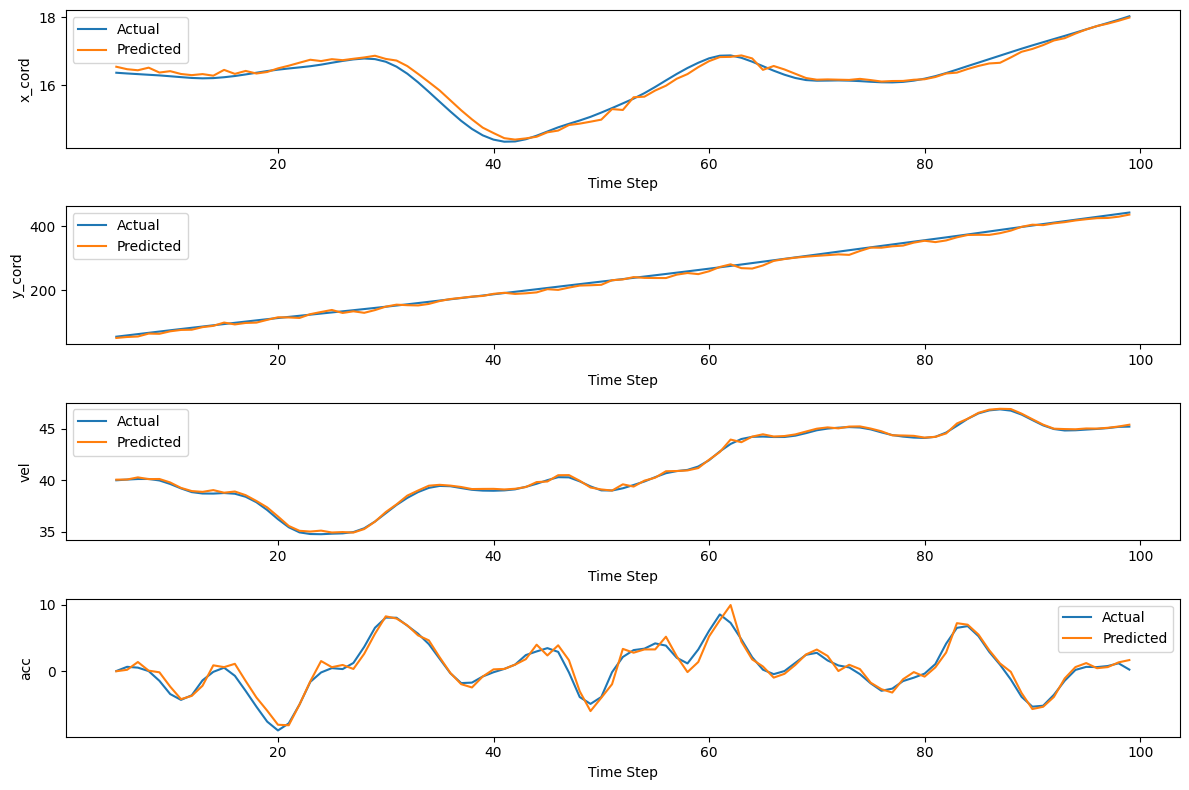

In [ ]:
# Extract the first 100 samples from the original dataset
subset_df = df.iloc[:100]

# Preprocess the subset data using the same scaler
subset_scaled = scaler.transform(subset_df)

# Prepare input sequences for prediction
subset_X = []
for i in range(n_past, len(subset_scaled) - n_future + 1):
    subset_X.append(subset_scaled[i - n_past:i, :num_features])
subset_X = np.array(subset_X)

# Make predictions
subset_predictions = model.predict([subset_X, subset_X[:, -n_future:, :]])

# Inverse transform the predicted values
subset_predictions_inv = scaler.inverse_transform(subset_predictions.squeeze())

# Plot comparison graph for each parameter
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
plt.tight_layout()
plt.show()


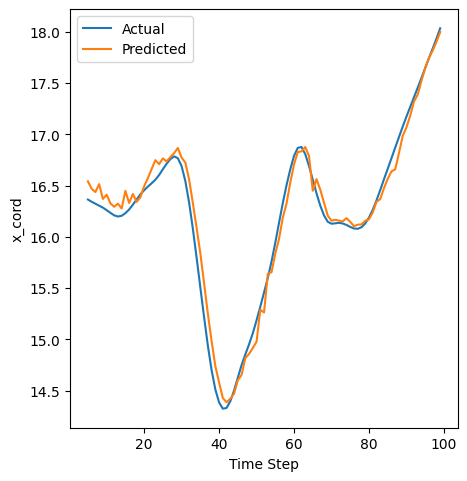

In [ ]:
plt.figure(figsize=(5, 25))
for i in range(0,1):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
    plt.show()
# plt.tight_layout()
plt.show()

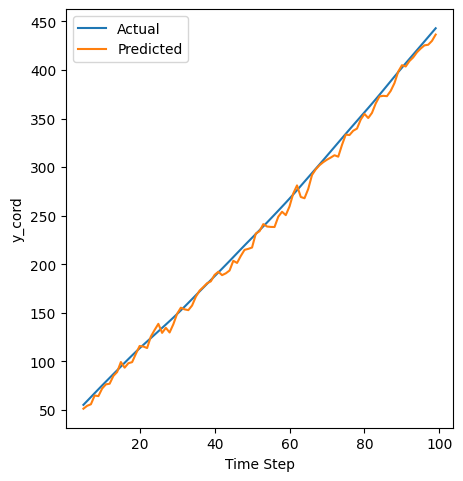

In [ ]:
plt.figure(figsize=(5, 25))
for i in range(1,2):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
    plt.show()
# plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(2,25))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
plt.tight_layout()
plt.show()

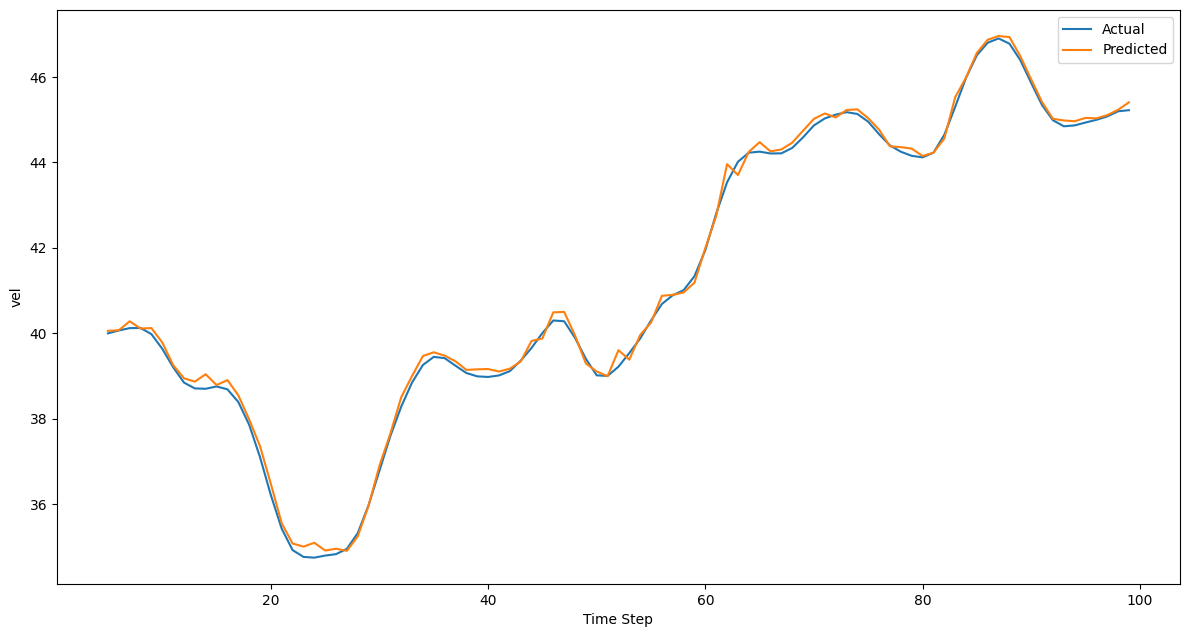

In [ ]:
plt.figure(figsize=(12, 25))
for i in range(2,3):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
plt.tight_layout()
plt.show()

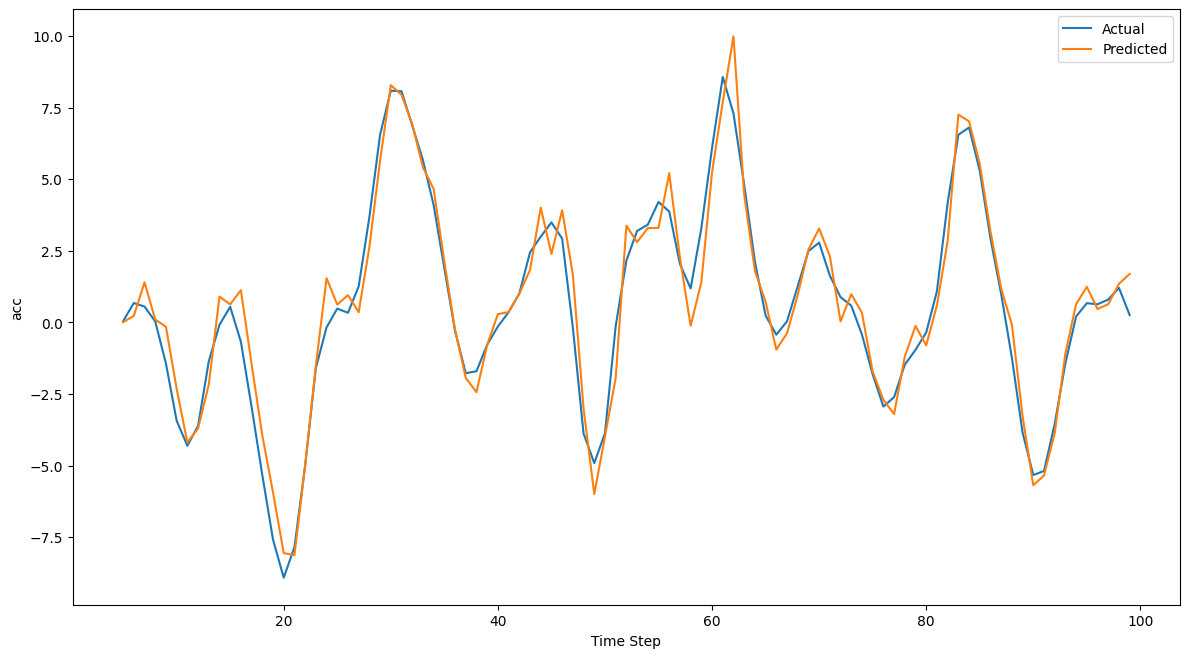

In [ ]:
plt.figure(figsize=(12, 25))
for i in range(3,4):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
plt.tight_layout()
plt.show()

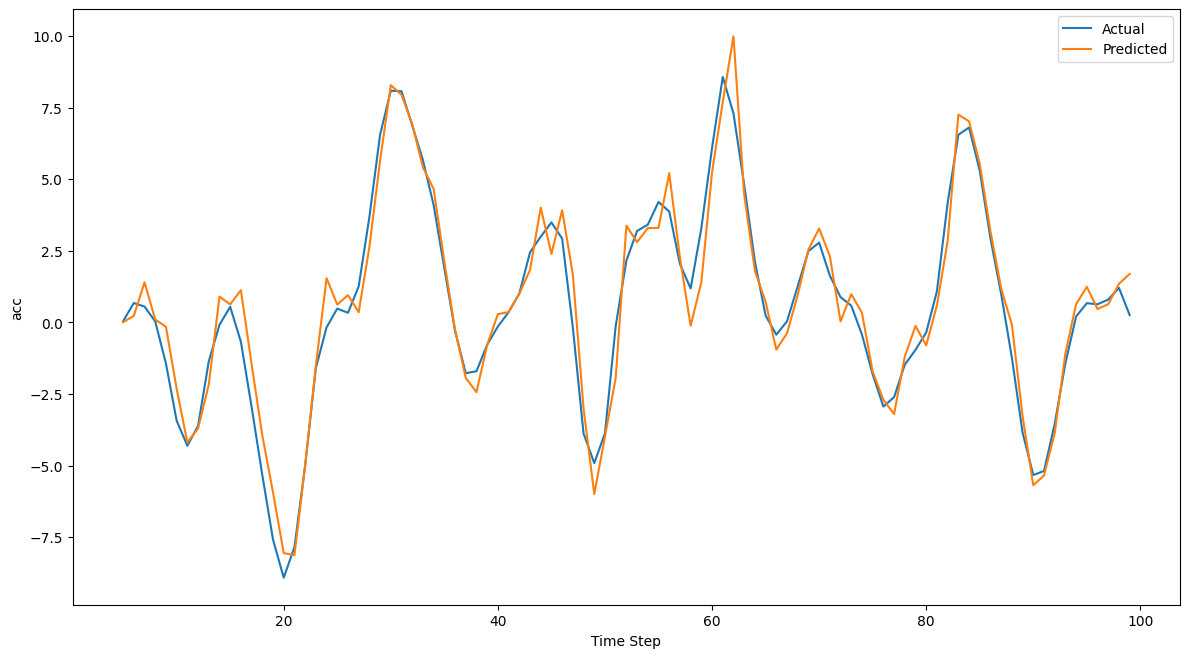

In [ ]:
plt.figure(figsize=(12, 25))
for i in range(3,4):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(subset_df.index[n_past:], subset_df.iloc[n_past:, i], label='Actual')
    plt.plot(subset_df.index[n_past:], subset_predictions_inv[:, i], label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel(cols[i])
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
